In [1]:
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('medical_insurance.csv')
data

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


<Axes: xlabel='region', ylabel='expenses'>

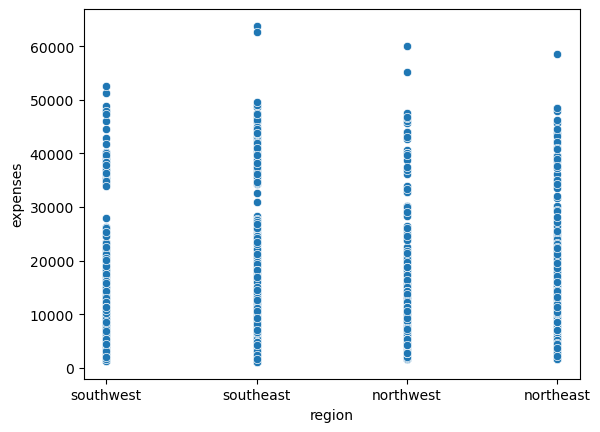

In [7]:
sns.scatterplot(x='region', y='expenses', data=data)

In [3]:
exact_duplicates =data[data.duplicated()]
exact_duplicates 

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
581,19,male,30.6,0,no,northwest,1639.56,16.3956


<Axes: >

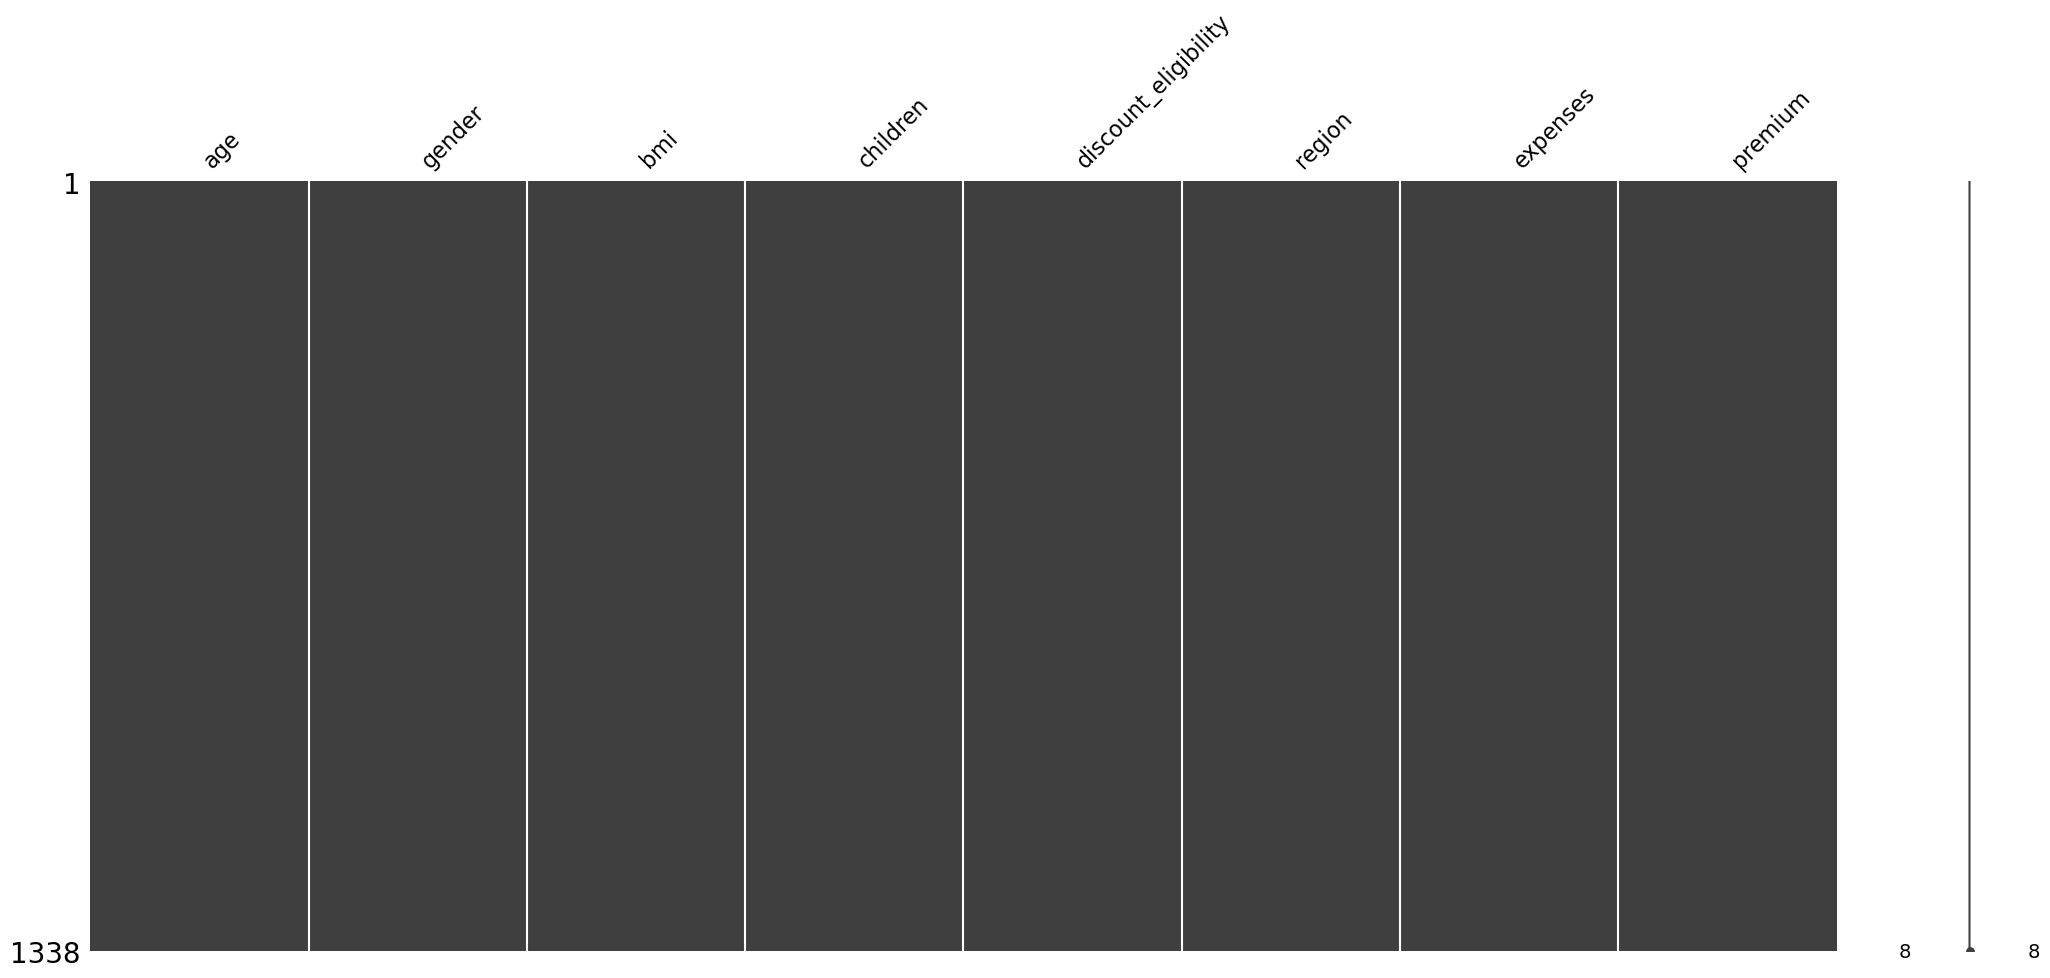

In [26]:
msno.matrix(data)

In [22]:
data.iloc[len(data) - 1] = data.iloc[0]
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Length: 1338, dtype: bool

In [21]:
data.drop_duplicates(subset=['age', 'expenses'], keep='last')

,age,gender,bmi,children,discount_eligibility,region,expenses,premium
0,19,female,27.9,0,yes,southwest,16884.92,168.8492
1,18,male,33.8,1,no,southeast,1725.55,17.2555
2,28,male,33.0,3,no,southeast,4449.46,44.4946
3,33,male,22.7,0,no,northwest,21984.47,439.6894
4,32,male,28.9,0,no,northwest,3866.86,77.3372
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,212.0110
1334,18,female,31.9,0,no,northeast,2205.98,22.0598
1335,18,female,36.9,0,no,southeast,1629.83,16.2983
1336,21,female,25.8,0,no,southwest,2007.95,20.0795


In [3]:
data['premium'].unique()

array([ 168.8492,   17.2555,   44.4946, ...,   16.2983,   20.0795,
       1165.6544], shape=(1337,))

In [4]:
pd.to_numeric(data['expenses'], errors='raise')

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [5]:
assert len(data['gender'].unique()) == 2

In [6]:
data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [7]:
data['premium'].describe()

count    1338.000000
mean      262.874685
std       292.532178
min        11.218700
25%        87.354250
50%       174.997400
75%       342.908900
max      1983.106400
Name: premium, dtype: float64

In [8]:
data.memory_usage()

Index                     132
age                     10704
gender                  10704
bmi                     10704
children                10704
discount_eligibility    10704
region                  10704
expenses                10704
premium                 10704
dtype: int64

In [9]:

mixed_types = {}
for column in data.columns:
    types = data[column].apply(lambda x: type(x).__name__).value_counts()
    mixed_types[column] = types.to_dict()
    

In [10]:
mixed_types

{'age': {'int': 1338},
 'gender': {'str': 1338},
 'bmi': {'float': 1338},
 'children': {'int': 1338},
 'discount_eligibility': {'str': 1338},
 'region': {'str': 1338},
 'expenses': {'float': 1338},
 'premium': {'float': 1338}}

In [11]:
def clean_numeric_column(series):
    # Convert to numeric, forcing errors to NaN
    numeric_series = pd.to_numeric(series, errors="coerce")

    # Check what percentage of data was lost
    percent_lost = (series.dropna().size - numeric_series.count()) / series.size * 100

    print(f"Percentage of data lost: {percent_lost:.2f}%")
    return numeric_series

In [12]:
clean_numeric_column(data["expenses"])

Percentage of data lost: 0.00%


0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [13]:
data.isnull().sum()

age                     0
gender                  0
bmi                     0
children                0
discount_eligibility    0
region                  0
expenses                0
premium                 0
dtype: int64

In [14]:
data.dtypes

age                       int64
gender                   object
bmi                     float64
children                  int64
discount_eligibility     object
region                   object
expenses                float64
premium                 float64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


In [16]:
data.select_dtypes(include=[object])

,gender,discount_eligibility,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [17]:
data.describe()

,age,bmi,children,expenses,premium
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414,262.874685
std,14.049960,6.098382,1.205493,12110.011240,292.532178
min,18.000000,16.000000,0.000000,1121.870000,11.218700
25%,27.000000,26.300000,0.000000,4740.287500,87.354250
50%,39.000000,30.400000,1.000000,9382.030000,174.997400
75%,51.000000,34.700000,2.000000,16639.915000,342.908900
max,64.000000,53.100000,5.000000,63770.430000,1983.106400


In [18]:
data['discount_eligibility'].unique()

array(['yes', 'no'], dtype=object)